In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
df = pd.read_csv('C:/Users/ncssa/Downloads/cleandf_cars.csv')

In [10]:
df

bt      km transmission  ownerNo                  model  \
0     Hatchback  120000       Manual        3         Maruti Celerio   
1           SUV   32706       Manual        2          Ford Ecosport   
2     Hatchback   11949       Manual        1             Tata Tiago   
3         Sedan   17794       Manual        1          Hyundai Xcent   
4           SUV   60000       Manual        1     Maruti SX4 S Cross   
...         ...     ...          ...      ...                    ...   
7337  Hatchback   10000       Manual        1         Maruti Celerio   
7338  Hatchback  120000       Manual        1        Maruti Alto 800   
7339      Sedan   50000    Automatic        3  Mercedes-Benz C-Class   
7340  Hatchback   40000       Manual        1            Maruti Ritz   
7341        SUV  120000       Manual        2         Renault Duster   

      modelYear     price Insurance Validity Fuel Type   RTO  ...  \
0          2015  400000.0        third party    Petrol  KA51  ...   
1          2018  811000.0      comprehensive    Petrol  KA05  ...   
2          2018  585000.0      comprehensive    Petrol  KA03  ...   
3          2014  462000.0      comprehensive    Petrol  KA53  ...   
4          2015  790000.0        third party    Diesel  KA04  ...   
...         ...       ...                ...       ...   ...  ...   
7337       2022  510000.0        third party    Petrol  WB02  ...   
7338       2014  180000.0        third party    Petrol  WB02  ...   
7339       2011  550000.0        third party    Petrol  WB06  ...   
7340       2012  140000.0        third party    Petrol  WB02  ...   
7341       2017  500000.0        third party    Diesel  WB02  ...   

      Front Brake Type  Rear Brake Type  Top Speed  Acceleration  \
0      ventilated disc             drum      150.0         15.05   
1      ventilated disc             drum      170.0         12.90   
2                 disc             drum      150.0         14.30   
3                 disc             drum      172.0         14.20   
4      ventilated disc       solid disc      190.0         12.00   
...                ...              ...        ...           ...   
7337   ventilated disc             drum      170.0         12.90   
7338              disc             drum      140.0         19.00   
7339   ventilated disc       solid disc      230.0          8.80   
7340   ventilated disc             drum      156.0         15.00   
7341              disc             drum      168.0         14.20   

            Tyre Type  No Door Numbers  Cargo Volumn  Wheel Size  \
0     tubeless radial              5.0         235.0   15.697549   
1     tubeless radial              4.0         352.0   16.000000   
2     tubeless radial              5.0         242.0   14.000000   
3     tubeless radial              4.0         407.0   14.000000   
4     tubeless radial              5.0         353.0   16.000000   
...               ...              ...           ...         ...   
7337  tubeless radial              5.0         313.0   15.697549   
7338    tubeless tyre              5.0         177.0   15.697549   
7339  tubeless radial              4.0         475.0   17.000000   
7340  tubeless radial              5.0         236.0   14.000000   
7341  tubeless radial              5.0         410.0   16.000000   

                                              car_links       city  
0     https://www.cardekho.com/used-car-details/used...  Bangalore  
1     https://www.cardekho.com/buy-used-car-details/...  Bangalore  
2     https://www.cardekho.com/used-car-details/used...  Bangalore  
3     https://www.cardekho.com/buy-used-car-details/...  Bangalore  
4     https://www.cardekho.com/used-car-details/used...  Bangalore  
...                                                 ...        ...  
7337  https://www.cardekho.com/used-car-details/used...    Kolkata  
7338  https://www.cardekho.com/used-car-details/used...    Kolkata  
7339  https://www.cardekho.com/used-car-details/used...    Kolka

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7342 entries, 0 to 7341
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bt                             7342 non-null   object 
 1   km                             7342 non-null   int64  
 2   transmission                   7342 non-null   object 
 3   ownerNo                        7342 non-null   int64  
 4   model                          7342 non-null   object 
 5   modelYear                      7342 non-null   int64  
 6   price                          7342 non-null   float64
 7   Insurance Validity             7342 non-null   object 
 8   Fuel Type                      7342 non-null   object 
 9   RTO                            7342 non-null   object 
 10  Features                       7342 non-null   int64  
 11  Comfort & Convenience          7342 non-null   float64
 12  Interior                       7342 non-null   f

In [12]:
newdf = df[['km','transmission','Fuel Type','city','ownerNo','modelYear','Displacement','Top Speed','Mileage','price','Seating Capacity']]
newdf


km transmission Fuel Type       city  ownerNo  modelYear  \
0     120000       Manual    Petrol  Bangalore        3       2015   
1      32706       Manual    Petrol  Bangalore        2       2018   
2      11949       Manual    Petrol  Bangalore        1       2018   
3      17794       Manual    Petrol  Bangalore        1       2014   
4      60000       Manual    Diesel  Bangalore        1       2015   
...      ...          ...       ...        ...      ...        ...   
7337   10000       Manual    Petrol    Kolkata        1       2022   
7338  120000       Manual    Petrol    Kolkata        1       2014   
7339   50000    Automatic    Petrol    Kolkata        3       2011   
7340   40000       Manual    Petrol    Kolkata        1       2012   
7341  120000       Manual    Diesel    Kolkata        2       2017   

      Displacement  Top Speed  Mileage     price  Seating Capacity  
0            998.0      150.0    23.10  400000.0               5.0  
1           1497.0      170.0    17.00  811000.0               5.0  
2           1199.0      150.0    23.84  585000.0               5.0  
3           1197.0      172.0    19.10  462000.0               5.0  
4           1248.0      190.0    23.65  790000.0               5.0  
...            ...        ...      ...       ...               ...  
7337         998.0      170.0    25.24  510000.0               5.0  
7338         796.0      140.0    22.74  180000.0               5.0  
7339        1796.0      230.0    11.74  550000.0               5.0  
7340        1197.0      156.0    18.50  140000.0               5.0  
7341        1461.0      168.0    19.72  500000.0               5.0  

[7342 rows x 11 columns]

In [13]:
print("'transmission' variable have {} unique category : {}\n".format(df['transmission'].nunique(), df['transmission'].unique()))
print("'Fuel Type' variable have {} unique category : {}\n".format(df['Fuel Type'].nunique(), \
                                                                     df['Fuel Type'].unique()))
print("'city' variable have {} unique category : {}\n".format(df['city'].nunique(), \
                                                                    df['city'].unique()))


'transmission' variable have 2 unique category : ['Manual' 'Automatic']

'Fuel Type' variable have 5 unique category : ['Petrol' 'Diesel' 'Electric' 'CNG' 'LPG']

'city' variable have 6 unique category : ['Bangalore' 'Chennai' 'Delhi' 'Jaipur' 'Hyderabad' 'Kolkata']



In [14]:
# Descriptive statistical summary of numerical features
newdf.describe()

km      ownerNo    modelYear  Displacement    Top Speed  \
count  7.342000e+03  7342.000000  7342.000000   7342.000000  7342.000000   
mean   5.939855e+04     1.347181  2016.736039   1378.947834   171.683130   
std    7.799056e+04     0.626139     3.543230    407.858856    17.725463   
min    0.000000e+00     0.000000  1985.000000      0.000000    80.000000   
25%    3.052225e+04     1.000000  2015.000000   1197.000000   165.000000   
50%    5.400000e+04     1.000000  2017.000000   1199.000000   170.000000   
75%    8.000000e+04     2.000000  2019.000000   1498.000000   171.430000   
max    5.500000e+06     5.000000  2023.000000   3982.000000   250.000000   

           Mileage         price  Seating Capacity  
count  7342.000000  7.342000e+03       7342.000000  
mean     19.569477  7.731280e+05          5.194089  
std       3.946255  9.362083e+05          0.638247  
min       8.000000  1.000000e+05          2.000000  
25%      17.300000  4.150000e+05          5.000000  
50%      19.010000  6.000000e+05          5.000000  
75%      21.790000  8.650000e+05          5.000000  
max     140.000000  4.150000e+07         10.000000

In [17]:
# The summary statistics provided represent descriptive statistics for a dataset of cars. Here's an interpretation of the columns:

# km: This shows the kilometers driven by the cars.

# Range: 0 to 5,500,000 km.
# Mean: 59,398.55 km.
# A wide standard deviation indicates significant variation in usage.
# ownerNo: Indicates the number of previous owners.

# Most cars have had 1–2 owners (median = 1.0, mean = 1.35).
# Some cars have been owned by up to 5 individuals.
# modelYear: The manufacturing year of the cars.

# Range: 1985 to 2023.
# Median year is 2017, and the majority are newer models, as indicated by the mean of ~2016.74.
# Displacement: Engine displacement in cubic centimeters (cc).

# Median value: 1199 cc.
# Max value: 3982 cc, showing a wide range from small engines to very powerful ones.
# Top Speed: The top speed of the vehicles in km/h.

# Median value: 170 km/h, with a maximum speed of 250 km/h.
# Mileage: Fuel efficiency in km per liter or a similar metric.

# Median value: 19.01.
# A maximum value of 140 likely corresponds to high-efficiency vehicles or outliers.
# price: The price of the cars in the dataset.

# Range: ₹100,000 to ₹41,500,000.
# Mean: ₹773,128, with substantial variability (std = ₹936,208).
# Seating Capacity: Number of seats in the vehicle.

# Median value: 5 seats, which is standard for most cars.
# Maximum: 10 seats, likely for larger vehicles like SUVs or vans.
# Observations:
# There are significant variations in mileage, displacement, and price, which might reflect a mix of budget and premium vehicles.
# The dataset contains some extreme values (e.g., km = 5,500,000, Mileage = 140, Price = ₹41.5 million), which might require investigation for outliers.
# The cars are predominantly newer models (post-2015).









In [20]:
newdf.to_csv('C:/Users/ncssa/Downloads/newcdf1.csv', index=False)

In [21]:
df = pd.read_csv('C:/Users/ncssa/Downloads/newcdf1.csv')

In [22]:

# Step 1: Remove Outliers using the IQR method for 'km' and 'price'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for 'km' and 'price'
df = remove_outliers(df, 'km')
df = remove_outliers(df, 'price')

# Step 2: Correct Data Errors
# Replace 0 values in 'Displacement' with the median displacement (assuming 0 is an error)
median_displacement = df[df['Displacement'] > 0]['Displacement'].median()
df['Displacement'] = df['Displacement'].replace(0, median_displacement)

# Cap unrealistic mileage values to a reasonable threshold (e.g., 30 km/l)
df['Mileage'] = np.where(df['Mileage'] > 30, df['Mileage'].median(), df['Mileage'])


# Display the cleaned dataset
print("Cleaned Dataset Summary:")
print(df.describe())



Cleaned Dataset Summary:
                  km      ownerNo    modelYear  Displacement    Top Speed  \
count    6747.000000  6747.000000  6747.000000   6747.000000  6747.000000   
mean    58778.806432     1.360605  2016.570179   1333.186009   169.837538   
std     32703.108709     0.635174     3.523365    348.963876    14.833618   
min         0.000000     0.000000  1985.000000     72.000000    80.000000   
25%     32483.000000     1.000000  2014.000000   1197.000000   165.000000   
50%     55450.000000     1.000000  2017.000000   1199.000000   170.000000   
75%     80000.000000     2.000000  2019.000000   1497.000000   170.000000   
max    153007.000000     5.000000  2023.000000   3597.000000   250.000000   

           Mileage         price  Seating Capacity  
count  6747.000000  6.747000e+03       6747.000000  
mean     19.728211  6.204135e+05          5.172373  
std       3.253258  2.987912e+05          0.603445  
min       9.000000  1.000000e+05          2.000000  
25%      17.5000

In [24]:
df[df['km']==0]

km transmission Fuel Type       city  ownerNo  modelYear  Displacement  \
4310   0       Manual    Petrol     Jaipur        1       2015         998.0   
5964   0       Manual    Diesel  Hyderabad        3       2007        1405.0   

      Top Speed  Mileage     price  Seating Capacity  
4310      152.0    20.51  350000.0               5.0  
5964      154.6    17.00  613000.0               5.0

In [25]:
df = df[df['km'] != 0]
df.describe()

km      ownerNo    modelYear  Displacement    Top Speed  \
count    6745.000000  6745.000000  6745.000000   6745.000000  6745.000000   
mean    58796.235285     1.360415  2016.571831   1333.225056   169.842442   
std     32692.286325     0.634939     3.521908    348.990652    14.833066   
min       150.000000     0.000000  1985.000000     72.000000    80.000000   
25%     32488.000000     1.000000  2014.000000   1197.000000   165.000000   
50%     55463.000000     1.000000  2017.000000   1199.000000   170.000000   
75%     80000.000000     2.000000  2019.000000   1497.000000   170.000000   
max    153007.000000     5.000000  2023.000000   3597.000000   250.000000   

           Mileage         price  Seating Capacity  
count  6745.000000  6.745000e+03       6745.000000  
mean     19.728500  6.204547e+05          5.172424  
std       3.253556  2.988173e+05          0.603527  
min       9.000000  1.000000e+05          2.000000  
25%      17.500000  4.000000e+05          5.000000  
50%      19.400000  5.700000e+05          5.000000  
75%      22.000000  7.900000e+05          5.000000  
max      28.400000  1.537000e+06         10.000000

In [26]:
# Key Observations:
# km (Kilometers Driven):

# The maximum value has been significantly reduced (previously 5,500,000 to 153,007), suggesting the removal of extreme outliers.
# Mean and standard deviation have also decreased, with an average of ~58,796 km.
# ownerNo (Number of Owners):

# Similar distribution as before, with most cars having 1–2 previous owners (mean = 1.36, median = 1.0).
# Maximum remains 5 owners.
# modelYear:

# Median and mean remain consistent (2017 and ~2016.57, respectively).
# The dataset includes models from 1985 to 2023.
# Displacement:

# Minimum displacement reduced slightly from 0 to 72 cc, while the maximum is now 3597 cc (previously 3982 cc), showing some outlier adjustments.
# Average displacement is ~1333 cc.
# Top Speed:

# Distribution remains similar, with a median of 170 km/h and a maximum of 250 km/h.
# Average top speed reduced slightly to ~169.84 km/h.
# Mileage:

# The range is more reasonable, with a maximum value of 28.4 (previously 140), likely indicating the removal of unrealistic or outlier values.
# Median and mean are consistent with the previous dataset (~19.4 and ~19.73).
# price:

# The maximum price is now ₹1.537 million (previously ₹41.5 million), indicating significant outlier removal.
# Average price is ₹620,454, which is lower than the previous mean (~₹773,128).
# Seating Capacity:

# The seating capacity distribution is unchanged, with most cars offering 5 seats (median and 75th percentile = 5).
# Improvements in the Dataset:
# Outliers in km, price, and Mileage appear to have been removed, resulting in more realistic and consistent data.
# The dataset is now better suited for predictive modeling and statistical analysis, as extreme values are less likely to distort results.


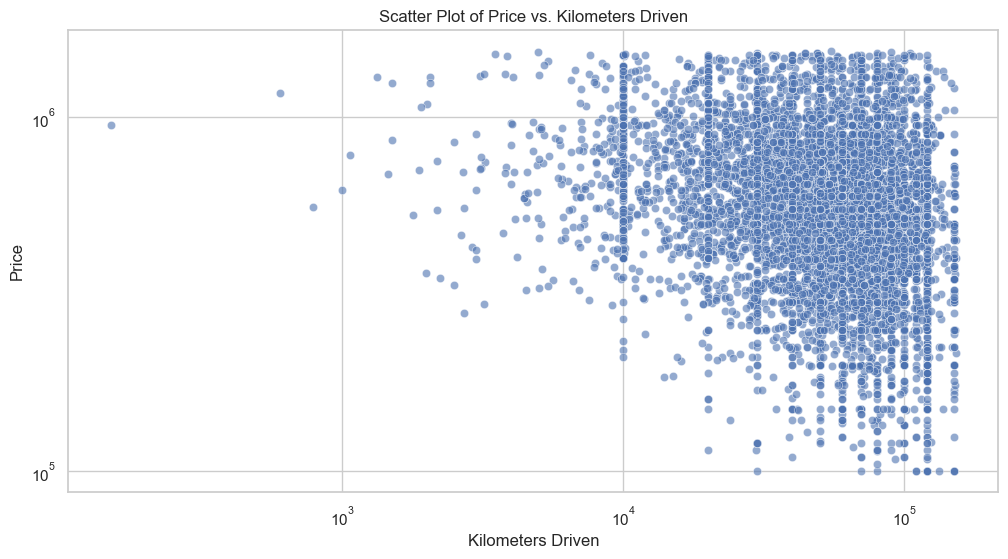

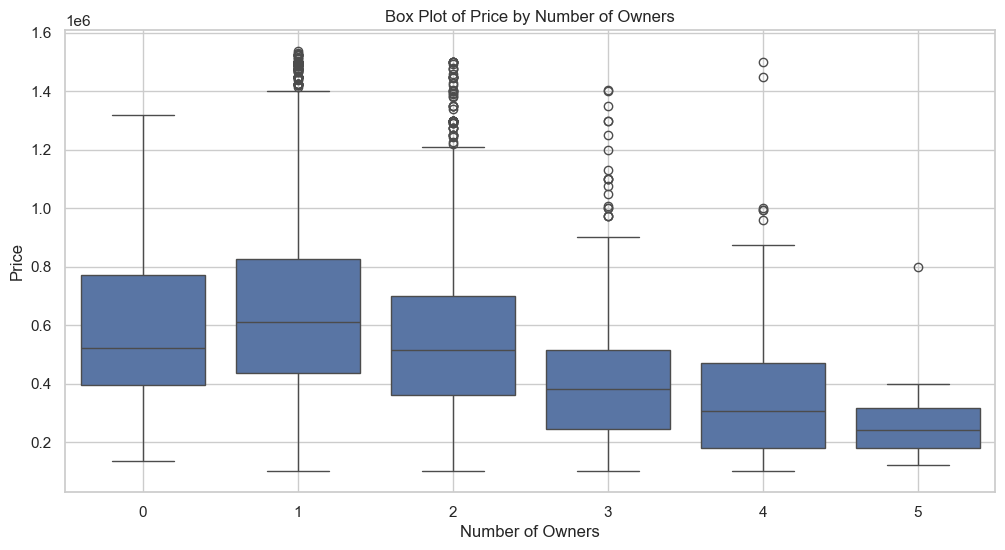

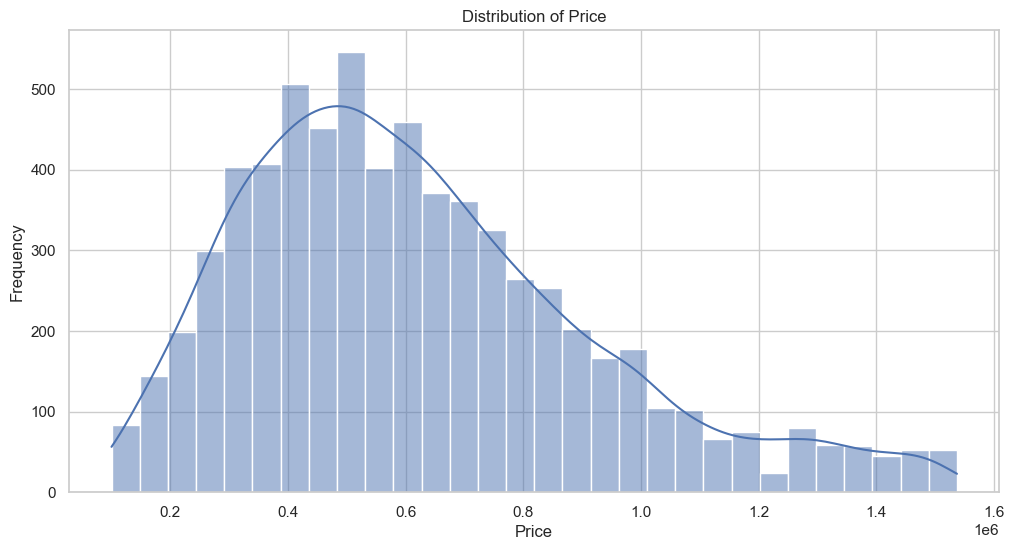

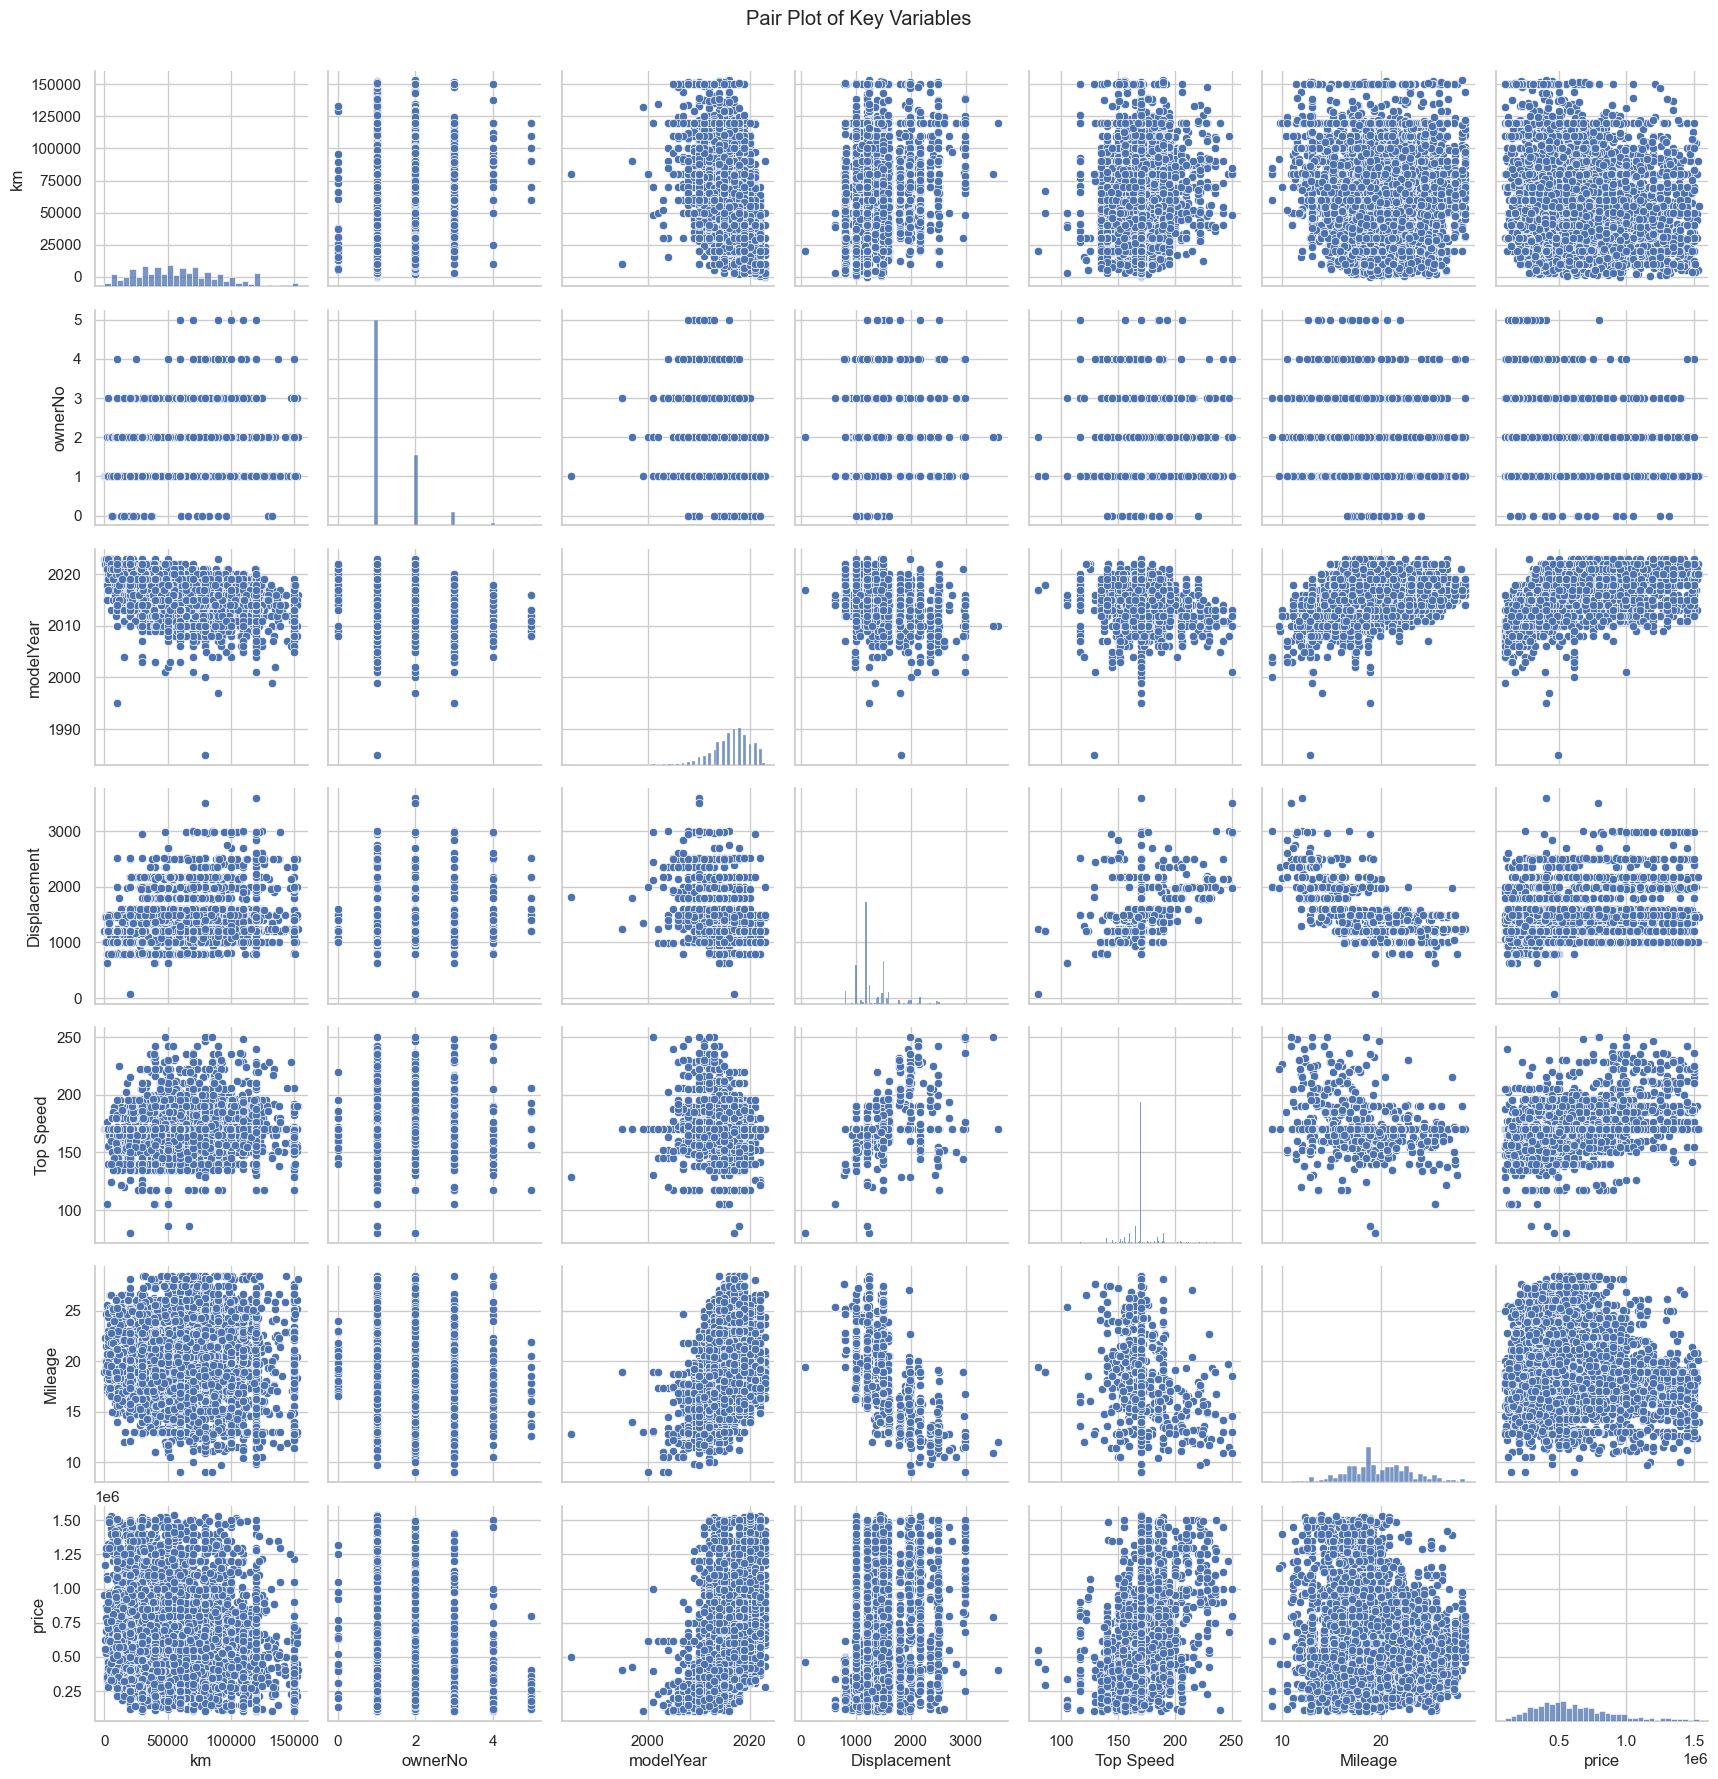

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your cleaned dataset
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Scatter Plot of Price vs. Kilometers Driven
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='km', y='price', alpha=0.6)
plt.title('Scatter Plot of Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.xscale('log')  # Using log scale for better visibility if there are large values
plt.yscale('log')
plt.grid(True)
plt.show()

# 2. Box Plot of Price by Owner Number
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ownerNo', y='price')
plt.title('Box Plot of Price by Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 3. Distribution of Price
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 4. Pair Plot of Key Variables
sns.pairplot(df[['km', 'ownerNo', 'modelYear', 'Displacement', 'Top Speed', 'Mileage', 'price']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()


In [28]:
final_df = df
final_df.head()

km transmission Fuel Type       city  ownerNo  modelYear  Displacement  \
0  120000       Manual    Petrol  Bangalore        3       2015         998.0   
1   32706       Manual    Petrol  Bangalore        2       2018        1497.0   
2   11949       Manual    Petrol  Bangalore        1       2018        1199.0   
3   17794       Manual    Petrol  Bangalore        1       2014        1197.0   
4   60000       Manual    Diesel  Bangalore        1       2015        1248.0   

   Top Speed  Mileage     price  Seating Capacity  
0      150.0    23.10  400000.0               5.0  
1      170.0    17.00  811000.0               5.0  
2      150.0    23.84  585000.0               5.0  
3      172.0    19.10  462000.0               5.0  
4      190.0    23.65  790000.0               5.0

In [29]:
# Descriptive statistical summary of categorical features
final_df.describe(include= 'object')


transmission Fuel Type       city
count          6745      6745       6745
unique            2         5          6
top          Manual    Petrol  Hyderabad
freq           5397      4734       1245

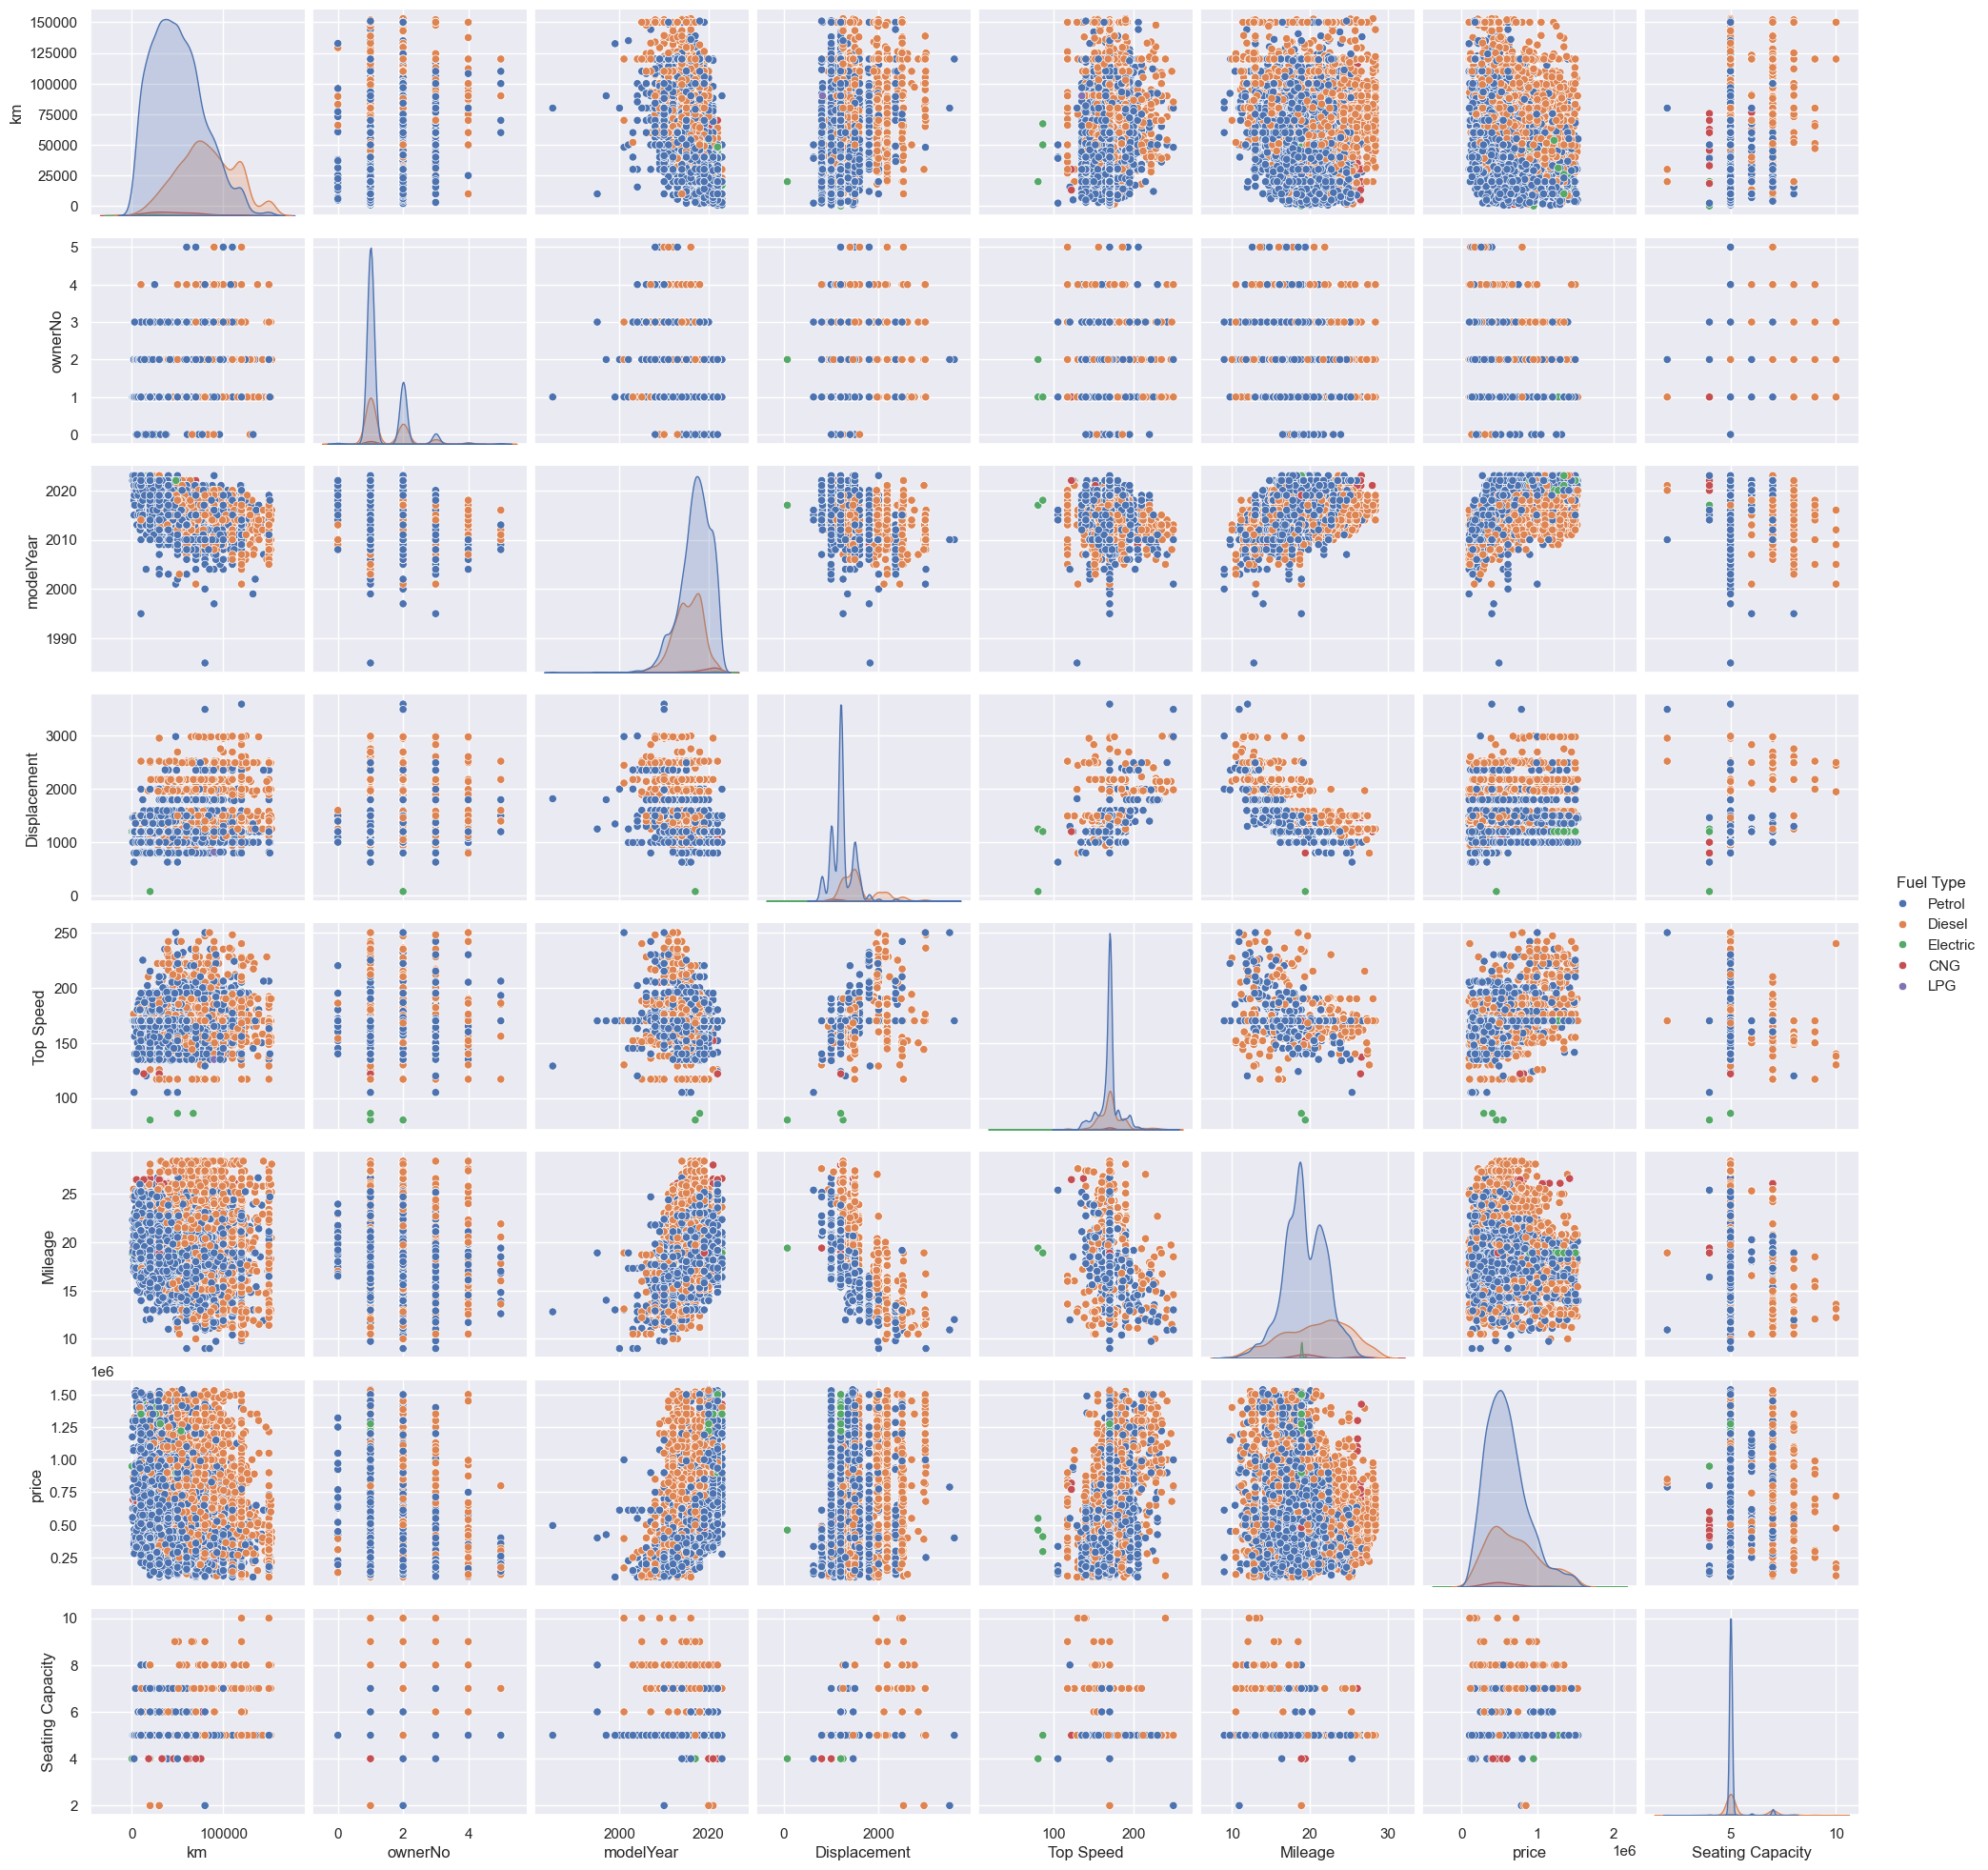

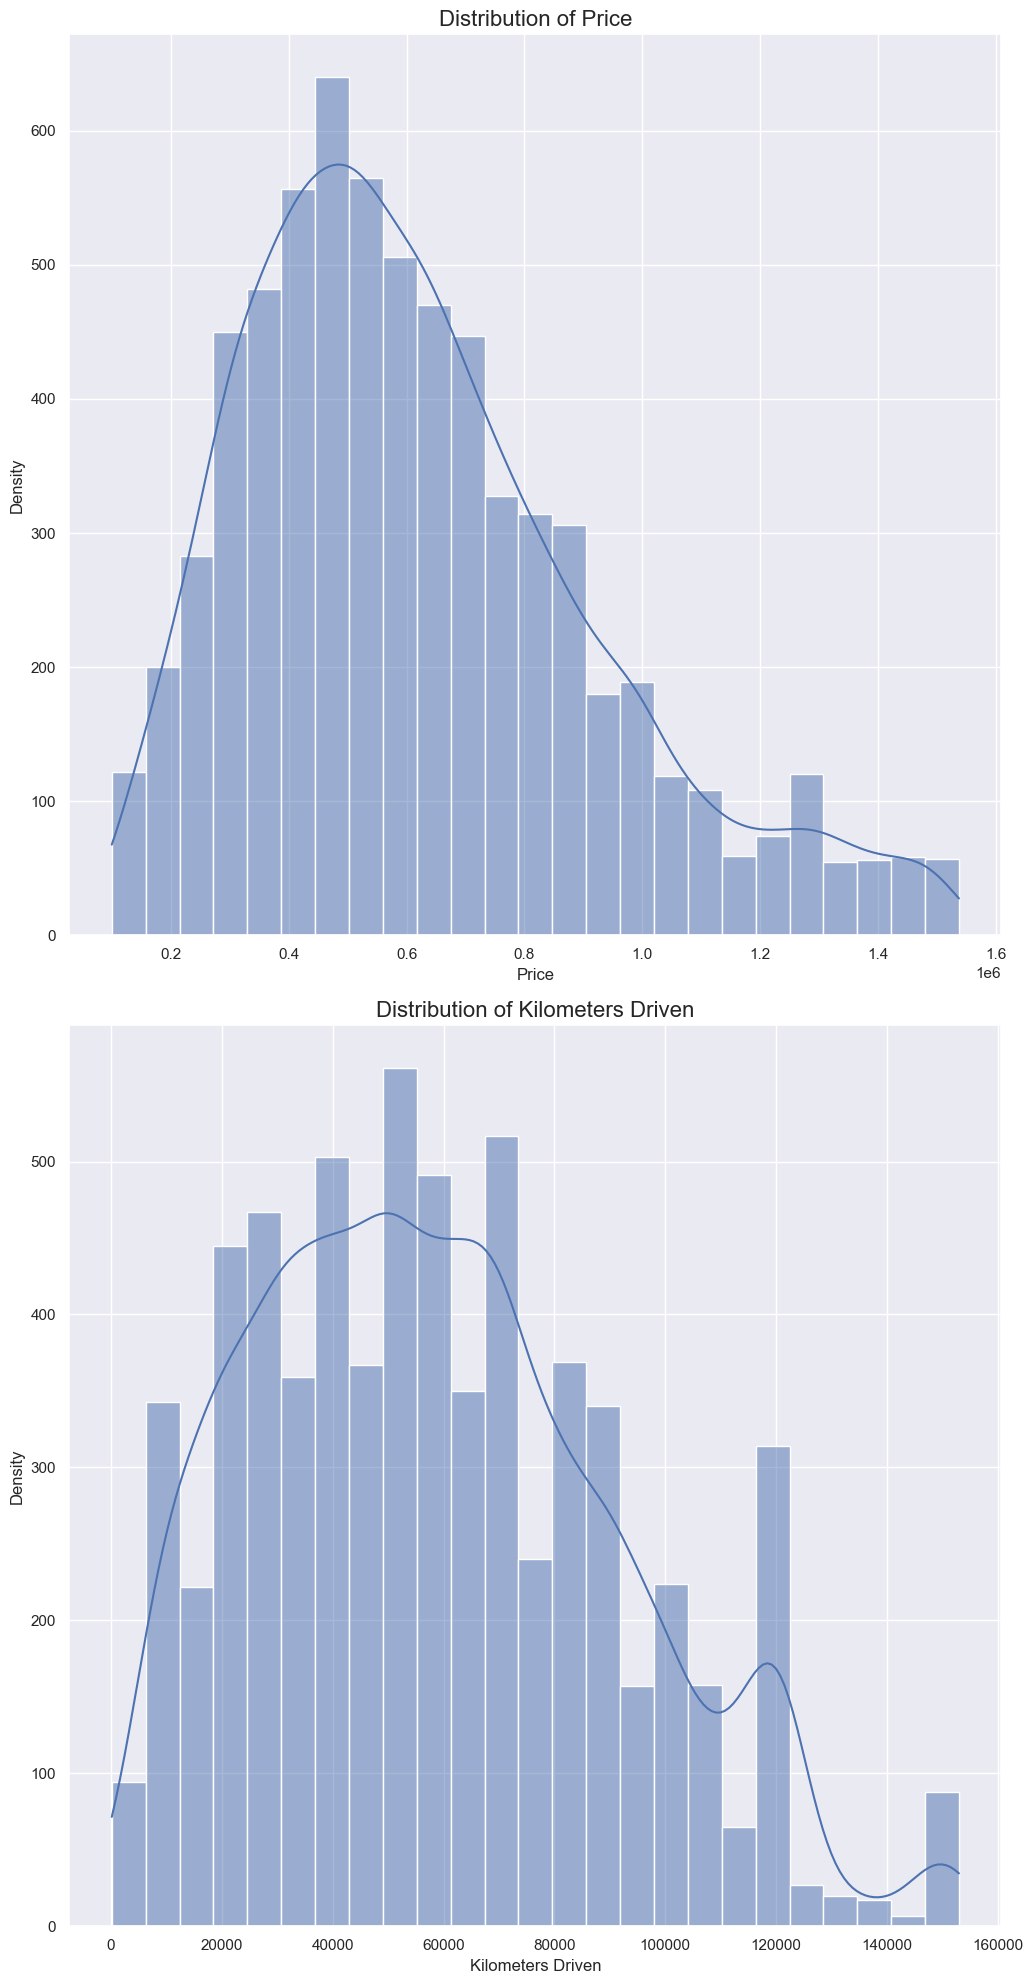

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df is your cleaned dataset
# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Pairplot colored by 'Fuel Type'
sns.pairplot(data=final_df, hue='Fuel Type', diag_kind='kde')
plt.show()

# Create figure for distribution plots
fig = plt.figure(figsize=(20, 20))

# Create subplots
ax0 = fig.add_subplot(2, 2, 1)  # Add subplot 1

ax2 = fig.add_subplot(2, 2, 3)  # Add subplot 2


# Subplot 1: Histogram and KDE of 'price' feature
sns.histplot(final_df['price'], bins=25, ax=ax0, kde=True)  # KDE added for density
ax0.set_title('Distribution of Price', fontsize=16)
ax0.set(xlabel='Price', ylabel='Density')


# Subplot 2: Histogram and KDE of 'km' feature
sns.histplot(final_df['km'], bins=25, ax=ax2, kde=True)  # KDE added for density
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel='Kilometers Driven', ylabel='Density')


plt.tight_layout()  # Adjust layout
plt.show()


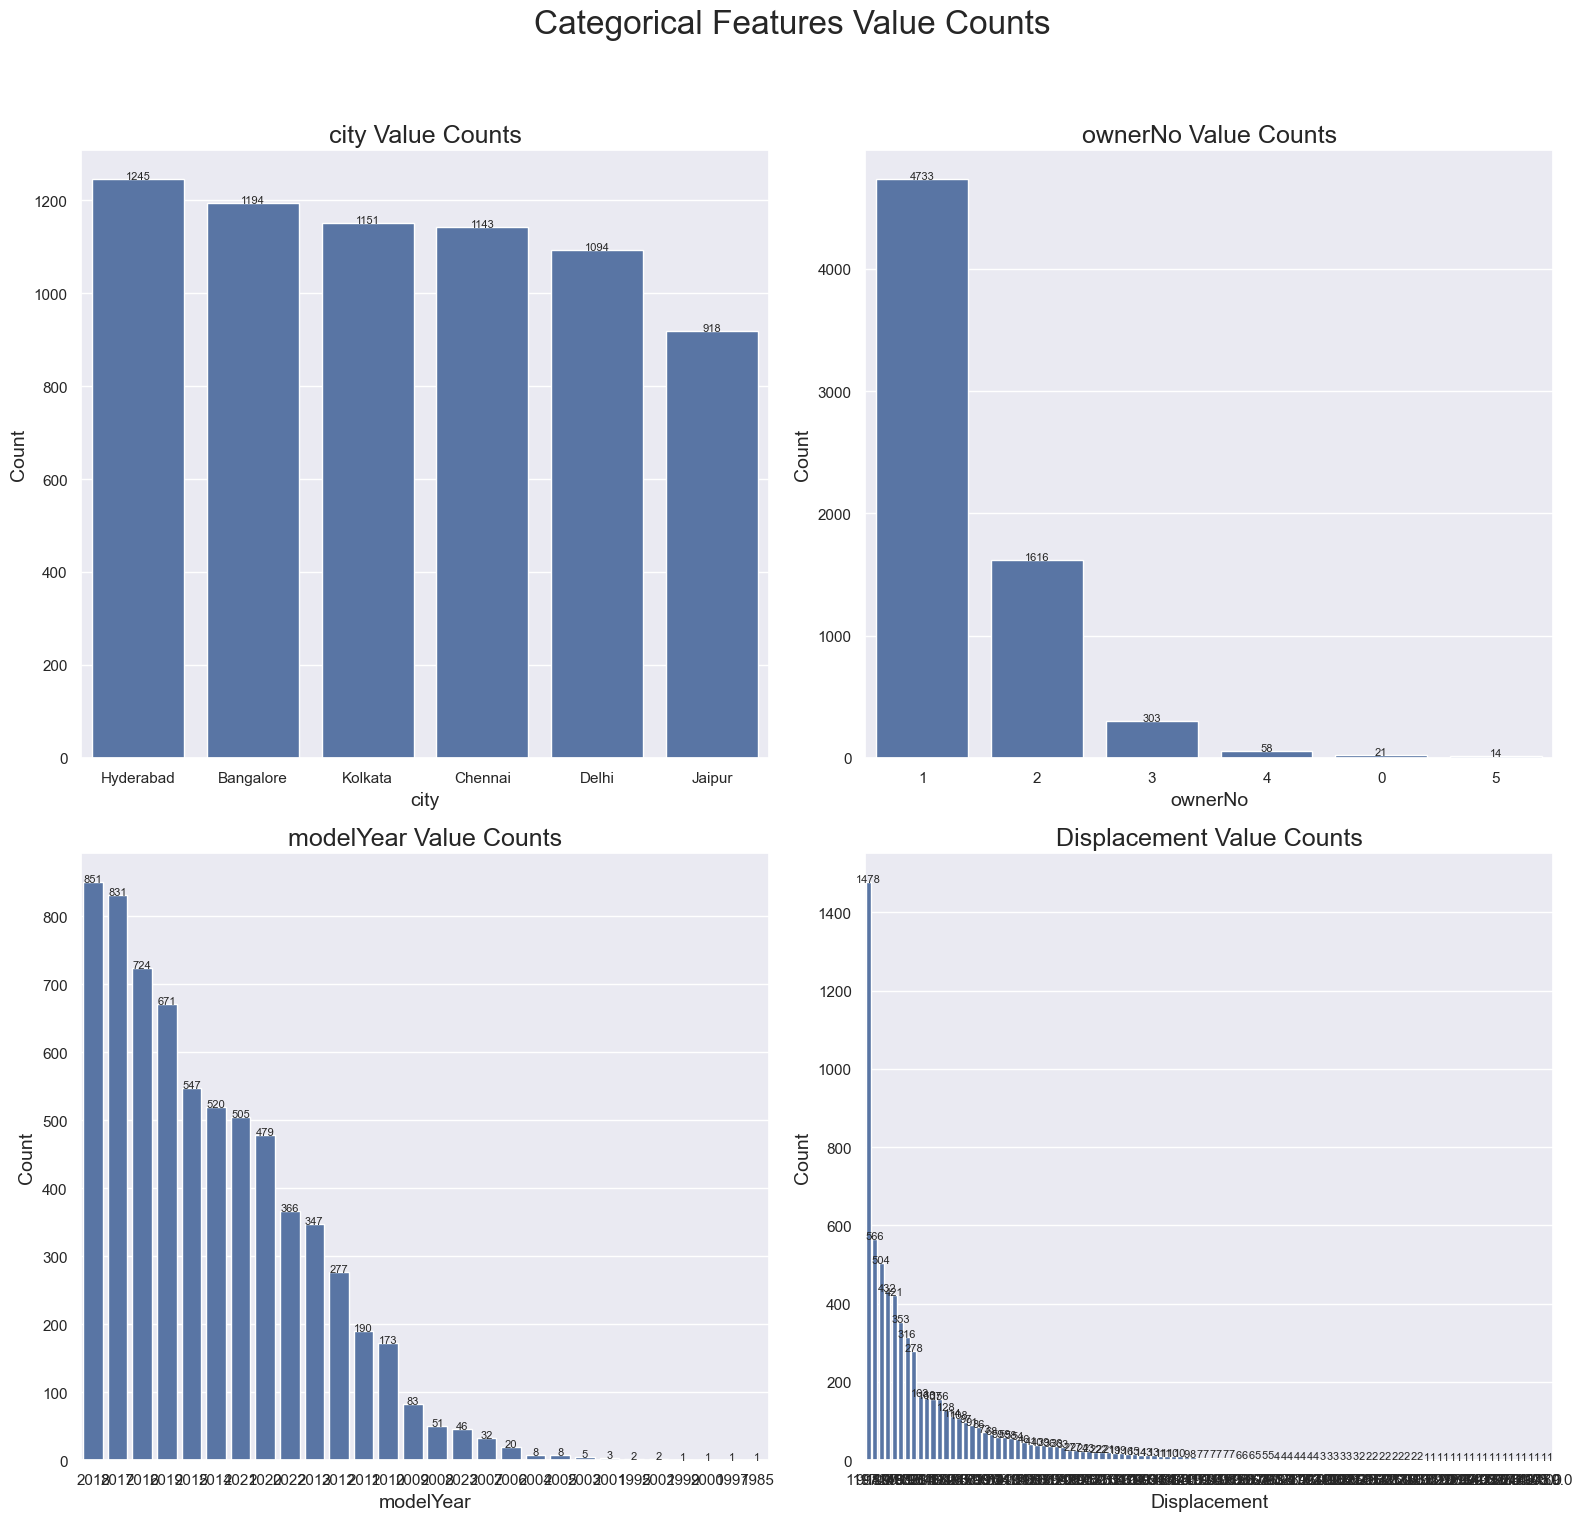

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_df' is your cleaned DataFrame
cat_col = list(final_df.columns[3:7])  # Adjust as necessary based on your DataFrame

# Create a figure for categorical feature count plots
fig = plt.figure(figsize=(16, 16))
plt.suptitle('Categorical Features Value Counts', fontsize=24)

# Loop through each categorical column and create a count plot
for k, column in enumerate(cat_col):
    ax = fig.add_subplot(2, 2, k + 1)  # Adjust subplot indexing
    cat_order = final_df[column].value_counts()  # Get value counts
    sns.countplot(data=final_df, x=column, order=cat_order.index, ax=ax)
    
    # Labeling the axes and setting the title
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'{column} Value Counts', fontsize=18)
    
    # Adding value labels on top of the bars
    for j in range(cat_order.shape[0]):
        count = cat_order.iloc[j]
        plt.text(j, count + 0.1, str(count), ha='center', fontsize=8)

# Adjust layout to prevent overlap and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # To adjust for the suptitle
plt.show()


In [32]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = final_df.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col])
    label_encoders[col] = le  # Store the encoder for each column
final_df.head()


km  transmission  Fuel Type  city  ownerNo  modelYear  Displacement  \
0  120000             1          4     0        3       2015         998.0   
1   32706             1          4     0        2       2018        1497.0   
2   11949             1          4     0        1       2018        1199.0   
3   17794             1          4     0        1       2014        1197.0   
4   60000             1          1     0        1       2015        1248.0   

   Top Speed  Mileage     price  Seating Capacity  
0      150.0    23.10  400000.0               5.0  
1      170.0    17.00  811000.0               5.0  
2      150.0    23.84  585000.0               5.0  
3      172.0    19.10  462000.0               5.0  
4      190.0    23.65  790000.0               5.0

In [54]:
final_df.head(10)

km  transmission  Fuel Type  city  ownerNo  modelYear  Displacement  \
0  120000             1          4     0        3       2015         998.0   
1   32706             1          4     0        2       2018        1497.0   
2   11949             1          4     0        1       2018        1199.0   
3   17794             1          4     0        1       2014        1197.0   
4   60000             1          1     0        1       2015        1248.0   
5   37772             1          4     0        1       2017        1198.0   
6   30000             0          4     0        1       2021         998.0   
7   37000             0          4     0        1       2018        1462.0   
8   11949             1          4     0        1       2017        1199.0   
9   50000             1          4     0        1       2018        1197.0   

   Top Speed  Mileage      price  Seating Capacity  
0      150.0    23.10   400000.0               5.0  
1      170.0    17.00   811000.0               5.0  
2      150.0    23.84   585000.0               5.0  
3      172.0    19.10   462000.0               5.0  
4      190.0    23.65   790000.0               5.0  
5      150.0    20.63   345000.0               5.0  
6      170.0    18.15  1200000.0               5.0  
7      170.0    20.28   960000.0               5.0  
8      150.0    23.84   585000.0               5.0  
9      180.0    21.40   690000.0               5.0

<Axes: >

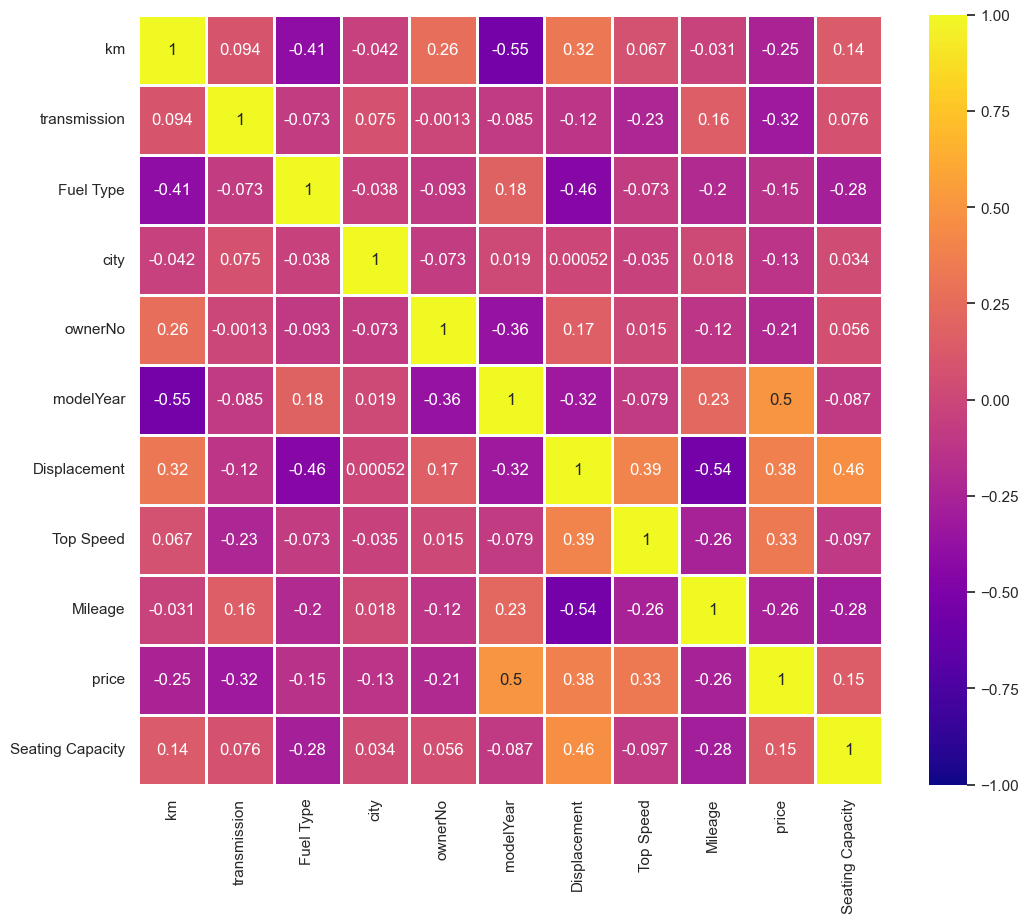

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data = final_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)



In [34]:
final_df.to_csv('C:/Users/ncssa/Downloads/final_df.csv',index = False)

In [35]:
final_df = pd.read_csv('C:/Users/ncssa/Downloads/final_df.csv')
final_df

km  transmission  Fuel Type  city  ownerNo  modelYear  Displacement  \
0     120000             1          4     0        3       2015         998.0   
1      32706             1          4     0        2       2018        1497.0   
2      11949             1          4     0        1       2018        1199.0   
3      17794             1          4     0        1       2014        1197.0   
4      60000             1          1     0        1       2015        1248.0   
...      ...           ...        ...   ...      ...        ...           ...   
6740   10000             1          4     5        1       2022         998.0   
6741  120000             1          4     5        1       2014         796.0   
6742   50000             0          4     5        3       2011        1796.0   
6743   40000             1          4     5        1       2012        1197.0   
6744  120000             1          1     5        2       2017        1461.0   

      Top Speed  Mileage     price  Seating Capacity  
0         150.0    23.10  400000.0               5.0  
1         170.0    17.00  811000.0               5.0  
2         150.0    23.84  585000.0               5.0  
3         172.0    19.10  462000.0               5.0  
4         190.0    23.65  790000.0               5.0  
...         ...      ...       ...               ...  
6740      170.0    25.24  510000.0               5.0  
6741      140.0    22.74  180000.0               5.0  
6742      230.0    11.74  550000.0               5.0  
6743      156.0    18.50  140000.0               5.0  
6744      168.0    19.72  500000.0               5.0  

[6745 rows x 11 columns]

In [36]:
final_df.dtypes

km                    int64
transmission          int64
Fuel Type             int64
city                  int64
ownerNo               int64
modelYear             int64
Displacement        float64
Top Speed           float64
Mileage             float64
price               float64
Seating Capacity    float64
dtype: object

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the target and features
X = final_df.drop(columns="price")  # Drop the target column from features
y = final_df["price"]               # Target variable


In [38]:
# To check important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)
ExtraTreesRegressor()
print(model.feature_importances_)


[0.05295341 0.09765477 0.04980032 0.04645955 0.02218799 0.31107594
 0.21145875 0.05681371 0.12619362 0.02540194]


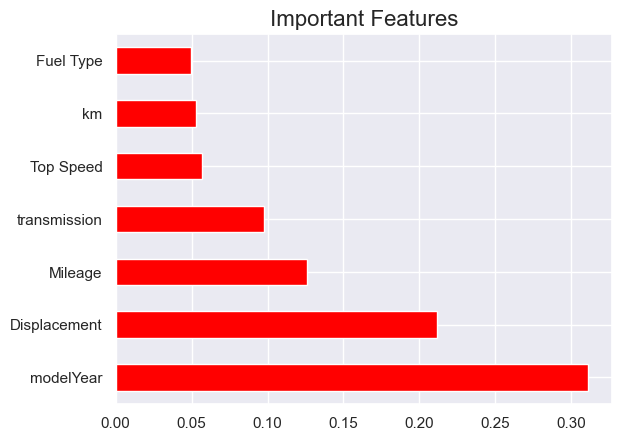

In [39]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()


In [40]:
#But in this project, we will use all features for prediction.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Model Building
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))
    
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()


Mean Squared Error  Root Mean Squared Error  \
Models                                                                    
Linear Regression                 3.028170e+10            174016.385379   
Support Vector Rregression        9.068865e+10            301145.559025   
Decision Tree Regressor           2.144056e+10            146425.950971   
Random Forest Regressor           1.232270e+10            111007.668662   
Ridge                             3.028137e+10            174015.422194   

                            Explained Variance Score  \
Models                                                 
Linear Regression                           0.653846   
Support Vector Rregression                  0.000308   
Decision Tree Regressor                     0.754874   
Random Forest Regressor                     0.859117   
Ridge                                       0.653850   

                            R-Square Score / Accuracy  
Models                                                 
Linear Regression                            0.653786  
Support Vector Rregression                  -0.036852  
Decision Tree Regressor                      0.754868  
Random Forest Regressor                      0.859113  
Ridge                                        0.653790

In [41]:
# Best Model:
# The Random Forest Regressor performs the best across all metrics:

# Mean Squared Error (MSE): Lowest (1.23 × 10¹⁰).
# Root Mean Squared Error (RMSE): Lowest (111,007).
# Explained Variance Score: Highest (0.8591).
# R-Square Score (R²): Highest (0.8591).
# Insights:
# Random Forest Regressor: Excellent choice if your priority is both accuracy and minimizing error.
# Decision Tree Regressor: Performs reasonably well, but not as robust as Random Forest due to potential overfitting.
# Linear Regression & Ridge Regression: Perform similarly, with moderate R² values and high error values. 
#     They may not capture complex patterns in the data.
# Support Vector Regression (SVR): Performs poorly, with negative R² indicating it doesn't generalize well for your dataset.


In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
import numpy as np

# Assuming final_df is your DataFrame containing features and target
X = final_df.drop(columns="price")  # Features
y = final_df["price"]                 # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Initializing the Random Forest Regressor
regressor = RandomForestRegressor(random_state=16)

# Performing k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(regressor, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Converting scores to positive values
mse_scores = -cv_scores  # Cross-validation returns negative MSE
rmse_scores = np.sqrt(mse_scores)

# Printing cross-validation results
print(f"Cross-Validation Mean Squared Errors: {mse_scores}")
print(f"Cross-Validation Root Mean Squared Errors: {rmse_scores}")
print(f"Average RMSE from Cross-Validation: {np.mean(rmse_scores)}")

# Training the model on the full training data
regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluating the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
explained_variance = explained_variance_score(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing the evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Explained Variance Score:", explained_variance)
print("R-Squared Score:", r_squared)


Cross-Validation Mean Squared Errors: [1.25626804e+10 1.28313024e+10 1.46369160e+10 1.40721487e+10
 1.28349167e+10]
Cross-Validation Root Mean Squared Errors: [112083.36367925 113275.33905078 120983.1227751  118626.08775661
 113291.29142121]
Average RMSE from Cross-Validation: 115651.84093659182

Test Set Evaluation Metrics:
Mean Squared Error: 10681370686.478922
Root Mean Squared Error: 103350.71691323153
Explained Variance Score: 0.8811581155264866
R-Squared Score: 0.8801226975069154


In [44]:
# The cross-validation and test set metrics show excellent performance for your model, specifically the Random Forest Regressor. Here's the analysis:

# Cross-Validation Results
# Mean Squared Errors (MSE): The MSE values vary slightly across folds, but they are consistently around 
# 1.2
# ×
# 1
# 0
# 10
# 1.2×10 
# 10
#   to 
# 1.46
# ×
# 1
# 0
# 10
# 1.46×10 
# 10
#  , indicating stable performance.
# Root Mean Squared Errors (RMSE): The RMSE values range from 112,083 to 120,983, showing good consistency.
# Average RMSE: 
# 115
# ,
# 651.84
# 115,651.84, which aligns closely with the range of RMSE values from the individual folds. 
#     This consistency indicates reliable model performance on unseen data.
# Test Set Results
# MSE: 
# 1.07
# ×
# 1
# 0
# 10
# 1.07×10 
# 10
#  , which is better than the average from cross-validation, indicating strong generalization.
# RMSE: 
# 103
# ,
# 350.72
# 103,350.72, significantly lower than the cross-validation average. This suggests the model performs even better on the test set than anticipated.
# Explained Variance Score: 
# 0.881
# 0.881, which indicates the model explains 88.1% of the variance in the test data.
# R-Squared Score (R²): 
# 0.880
# 0.880, confirming strong predictive power and alignment with the explained variance score.
# Insights
# The test set metrics outperform the cross-validation metrics, suggesting the model generalizes well and 
#     the data distribution of the test set aligns closely with the training set.
# Low RMSE on the test set (
# 103
# ,
# 350
# 103,350) confirms minimal prediction error.

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [47]:
final_regressor_optimized = RandomForestRegressor(
    bootstrap=False, max_depth=30, max_features='sqrt', 
    min_samples_leaf=1, min_samples_split=5, 
    n_estimators=300, random_state=42
)
final_regressor_optimized.fit(X_train, y_train)


RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=300, random_state=42)

In [48]:
# Making predictions
y_pred = final_regressor_optimized.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Explained Variance Score:", explained_variance)
print("R-Square Score:", r2)

Mean Squared Error: 10314268933.238232
Root Mean Squared Error: 101559.18930967414
Explained Variance Score: 0.8847389345448602
R-Square Score: 0.8842426900819024


In [49]:
# Conclusion:
# The fine-tuned hyperparameters have improved the performance of your model. The adjustments made (especially increasing the number of trees to 300
# and limiting the depth to 30) have likely made the model more robust and less prone to overfitting.



In [51]:
#Saving the fine tuned model using pickle

In [53]:
import pickle

# Save the model to a file
with open('C:/Users/ncssa/carprice_prediction/final_regressor_optimized.pkl', 'wb') as f:
    pickle.dump(final_regressor_optimized, f)

# Confirm that the model is saved
print("Model saved successfully!")


Model saved successfully!
